# Personal Loan Campaign

### Problem Definition

Build a model that will help the marketing department of AllLife Bank to identify potential customers who have a higher probability of purchasing the loan.

### Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary / Feature Info

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import Main Libraries

In [1]:
!pip install uszipcode 

In [2]:
# import appropriate libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve)
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import zipcodes as zcode
import warnings
warnings.filterwarnings("ignore")

### Inspect Dataset Structure

In [3]:
bank_cust_data = pd.read_csv("Loan_Modelling.csv")   # load dataset

In [4]:
df = bank_cust_data.copy()   # copy dataset to dataframe and initialize

In [5]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")   # check data shape (rows and columns)

Dataset has 5000 rows and 14 columns


In [6]:
df.sample(5)   # generate a random sample of 5 rows

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3180,3181,27,3,103,92121,2,0.6,1,84,0,0,0,0,0
1360,1361,54,28,85,92028,4,4.9,1,0,0,0,0,1,0
4560,4561,43,18,13,94709,2,0.1,2,0,0,0,1,1,1
2649,2650,33,8,68,92407,4,1.3,1,0,0,0,0,1,0
2539,2540,32,7,98,95929,1,4.2,1,171,1,1,1,0,0


In [7]:
df.head()   # check first 5 rows

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail()   # check last 5 rows

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.drop('ID', axis=1, inplace=True)   # drop ID column since no analytical value

In [10]:
df.info()   # check missing values and data types for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [11]:
df.isnull().sum()   # confirm no missing values for each feature

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
# check unique value counts for each feature

for columns in df:
    print("Unique values in column", columns, ":")
    print(df[columns].value_counts())
    print("-" * 40)

Unique values in column Age :
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
----------------------------------------
Unique values in column Experience :
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85


In [13]:
df.describe().T  # check initial statistical summary

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### Observations
- Experience shows instances of negative values which might have been mistakenly entered. Need to convert to positive values. 
- No blatant outliers showing in initial summary.
- ZIPCode values not helpful unless coded to actual county names; match to respective counties using installed zip database.
- No missing values but need to dig deeper and confirm. 
- Dropped ID column as no analytical value.

### Data Preprocessing

In [14]:
# find and list all Experience values that are negative 

df[df['Experience'] < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [15]:
# convert negative Experience values to absolute values

df.loc[df['Experience'] < 0, 'Experience'] = np.abs(df['Experience'])

In [16]:
# categorize zipcode by respective county and create new County categorical feature

from uszipcode import SearchEngine
search = SearchEngine()
county = []
for i in np.arange(0, len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    county.append(zipcode.county)
    
df['County'] = county
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [17]:
df.info()   # check for missing values with new County column; there are 34 missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              4966 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [18]:
df['County'] = df['County'].astype('str')   # convert dtype to string to capture missing values

In [19]:
df['County'].value_counts()   # check unique value counts for County

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
None                        34
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

In [20]:
# missing values in County column showing as "None"; need to assign respective county names based on zip code search.

df[df['County'] == 'None'].sort_values(by=['ZIPCode'])   # list all rows showing County as "None"

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
4392,52,27,81,92634,4,3.80,2,0,0,0,0,0,0,None
3887,24,2,118,92634,2,7.20,1,0,0,1,0,1,0,None
468,34,10,21,92634,1,0.50,3,0,0,0,0,1,0,None
2218,38,13,9,92634,2,0.30,2,0,0,0,0,0,0,None
780,32,7,42,92634,4,0.80,1,0,0,0,0,1,1,None
4321,27,0,34,92717,1,2.00,2,112,0,0,0,0,1,None
4276,50,24,155,92717,1,7.30,1,0,0,0,0,1,1,None
4090,42,18,49,92717,3,2.10,3,0,0,1,0,1,0,None
2957,61,36,53,92717,3,0.50,2,0,0,0,0,1,0,None
2486,61,36,130,92717,1,1.30,1,257,0,0,0,0,0,None


In [21]:
# assign appropriate County name based on zipcode search

df.loc[df['ZIPCode'] == 92634, 'County'] = 'Orange County'
df.loc[df['ZIPCode'] == 92717, 'County'] = 'Orange County'
df.loc[df['ZIPCode'] == 93077, 'County'] = 'Ventura County'
df.loc[df['ZIPCode'] == 96651, 'County'] = 'Shasta County'

In [22]:
df.drop('ZIPCode', axis=1, inplace=True)   # drop ZIPCode column as we have better clarity with County names

In [23]:
# convert appropriate columns from int to category

cat_cols = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County']
df[cat_cols] = df[cat_cols].astype('category')

In [24]:
df.info()   # confirm data types after corrections and conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  County              5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 236.8 KB


In [25]:
df.describe().T   # check statistical summary again

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [26]:
# check unique value counts again for each feature

for columns in cat_cols:
    print("Unique values in column", columns, ":")
    print(df[columns].value_counts())
    print("-" * 40)

Unique values in column Family :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
Unique values in column Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
Unique values in column Personal_Loan :
0    4520
1     480
Name: Personal_Loan, dtype: int64
----------------------------------------
Unique values in column Securities_Account :
0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------
Unique values in column CD_Account :
0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------
Unique values in column Online :
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
Unique values in column CreditCard :
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------
Unique values in column County :
Los Angeles County        1095

#### Observations
- Personal Loan is the target variable.
- As for independent variables, there are 5 numerical features and 7 categorical features.
- Dropped ZIPCode column as we have County names which provides better clarity.

### Exploratory Data Analysis

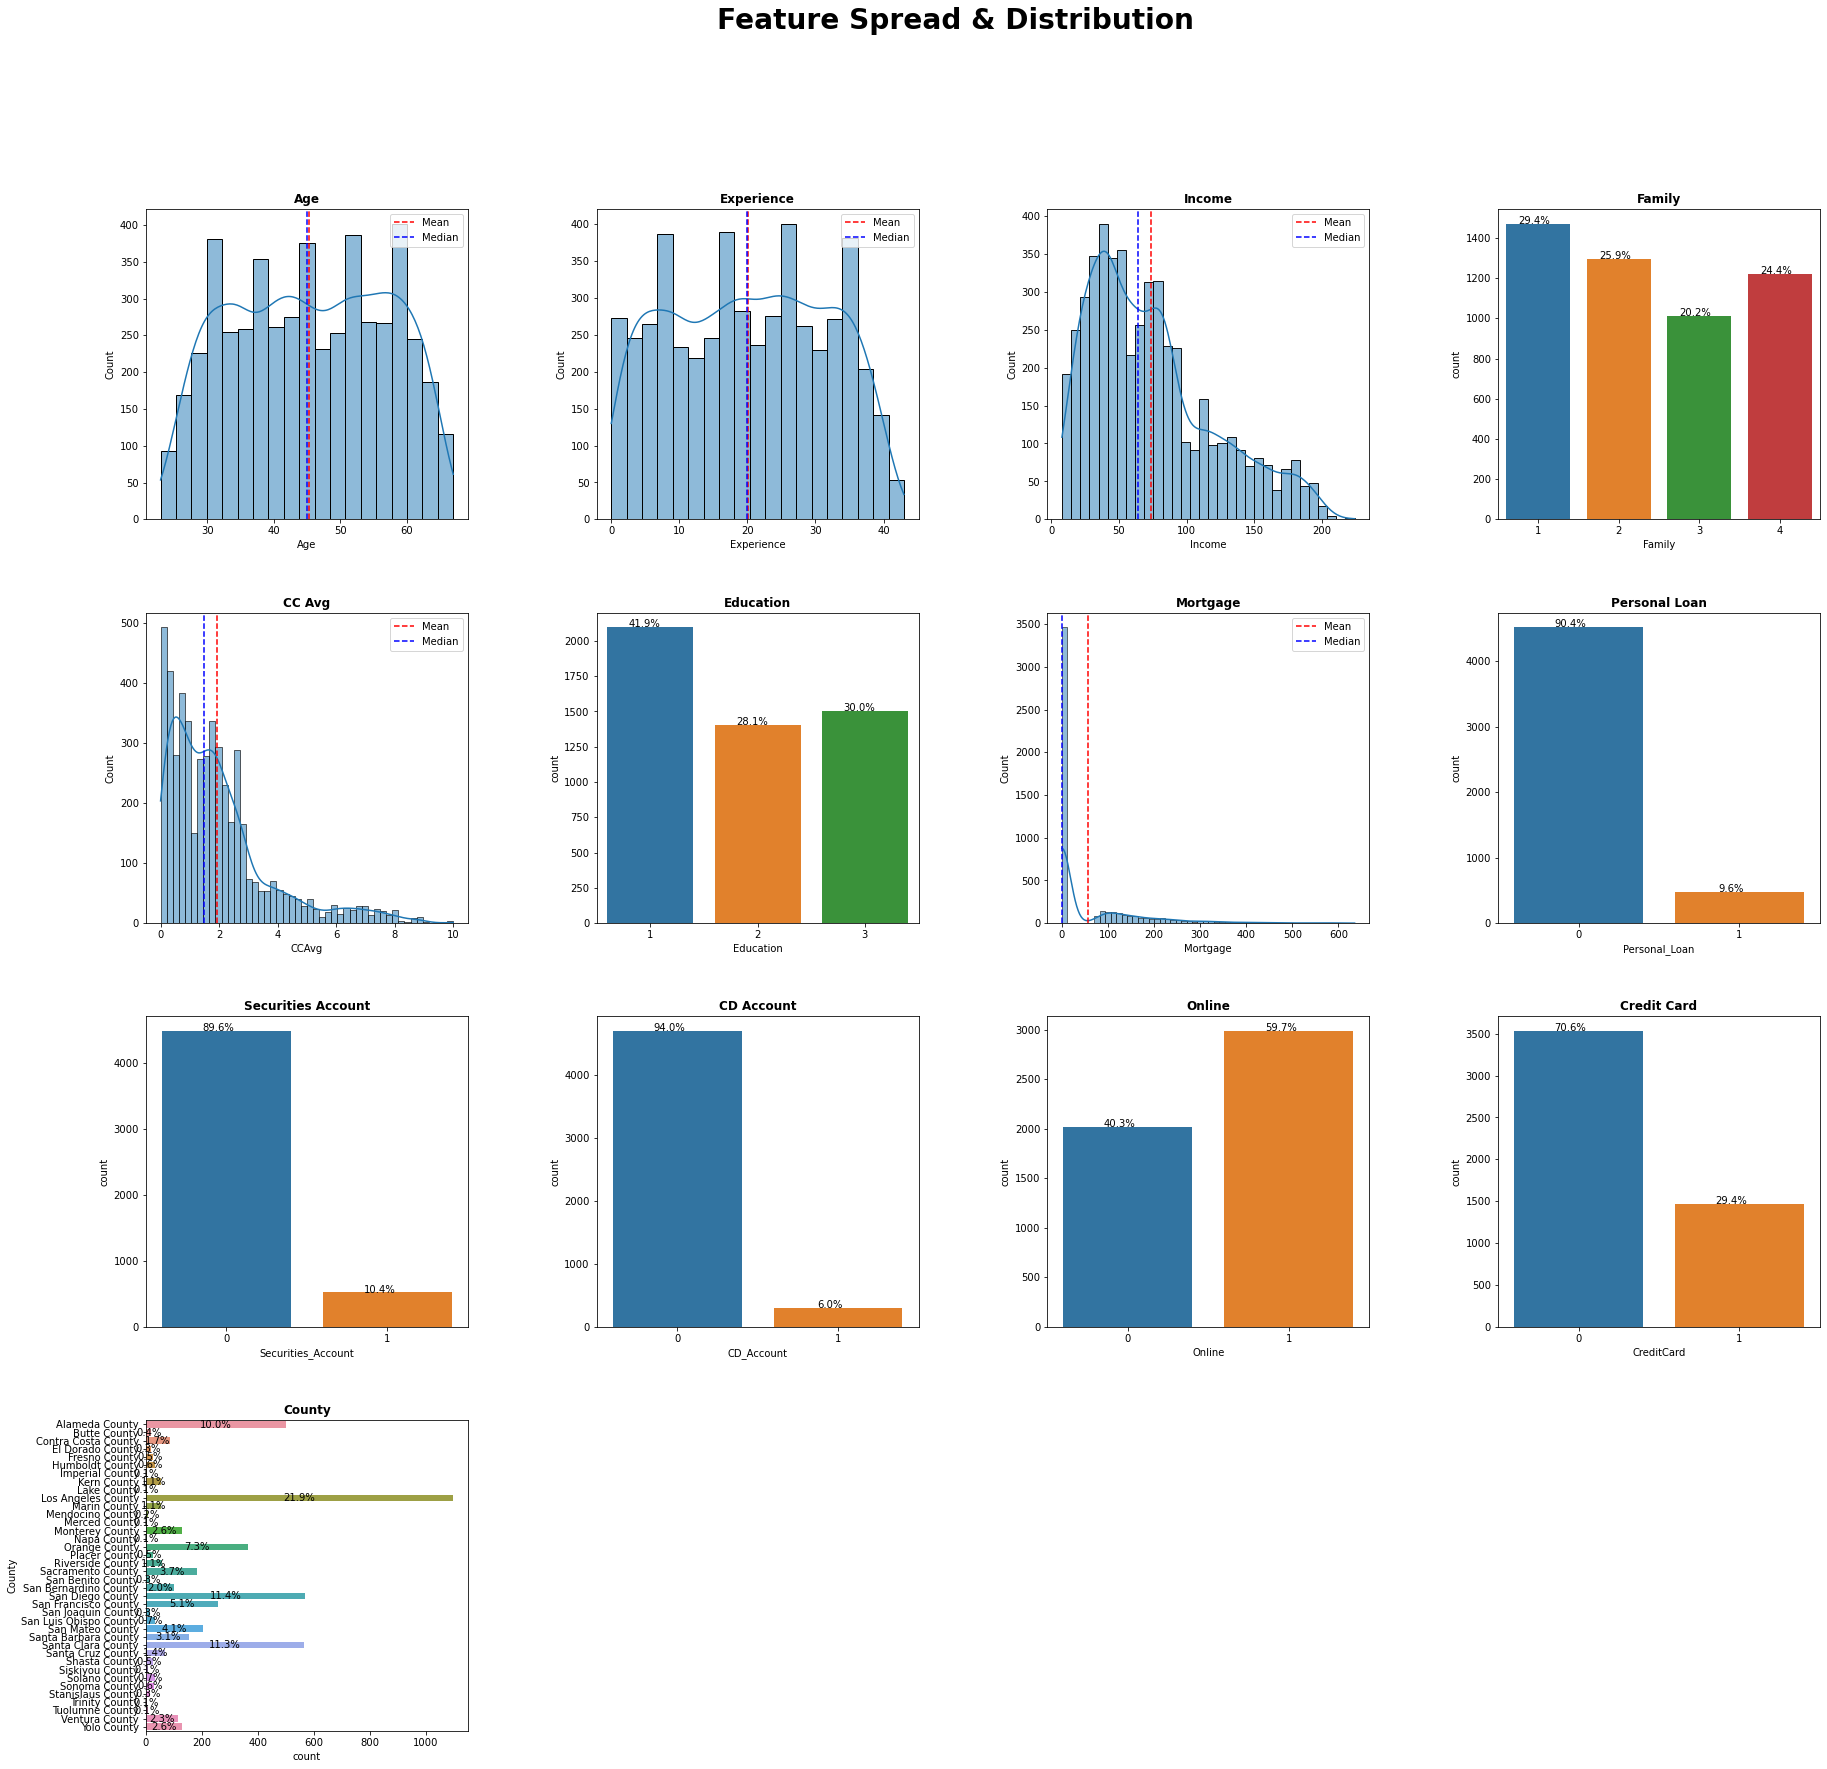

In [27]:
# create distribution plots for all features numerical and categorical
# create 4x4-grid master plot with 13 subplots

uvplot = plt.figure(figsize=[30,28])   
uvplot.subplots_adjust(hspace=0.3, wspace=0.4)
uvplot.suptitle("Feature Spread & Distribution", fontweight='bold', fontsize='28')

uvfeat0 = uvplot.add_subplot(4,4,1)
sns.histplot(df.Age, kde=True, ax=uvfeat0);
uvfeat0.set_title('Age', fontweight='bold')
uvfeat0.axvline(df['Age'].mean(), color='red', linestyle='--', label='Mean')
uvfeat0.axvline(df['Age'].median(), color='blue', linestyle='--', label='Median')
uvfeat0.legend()

uvfeat1 = uvplot.add_subplot(4,4,2)
sns.histplot(df.Experience, kde=True, ax=uvfeat1);
uvfeat1.set_title('Experience', fontweight='bold')
uvfeat1.axvline(df['Experience'].mean(), color='red', linestyle='--', label='Mean')
uvfeat1.axvline(df['Experience'].median(), color='blue', linestyle='--', label='Median')
uvfeat1.legend()

uvfeat2 = uvplot.add_subplot(4,4,3)
sns.histplot(df.Income, kde=True, ax=uvfeat2);
uvfeat2.set_title('Income', fontweight='bold')
uvfeat2.axvline(df['Income'].mean(), color='red', linestyle='--', label='Mean')
uvfeat2.axvline(df['Income'].median(), color='blue', linestyle='--', label='Median')
uvfeat2.legend()

uvfeat3 = uvplot.add_subplot(4,4,4)
ax3 = sns.countplot(x='Family', data=df, ax=uvfeat3);
uvfeat3.set_title('Family', fontweight='bold')
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Family']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat4 = uvplot.add_subplot(4,4,5)
sns.histplot(df.CCAvg, kde=True, ax=uvfeat4);
uvfeat4.set_title('CC Avg', fontweight='bold')
uvfeat4.axvline(df['CCAvg'].mean(), color='red', linestyle='--', label='Mean')
uvfeat4.axvline(df['CCAvg'].median(), color='blue', linestyle='--', label='Median')
uvfeat4.legend()

uvfeat5 = uvplot.add_subplot(4,4,6)
ax5 = sns.countplot(x='Education', data=df, ax=uvfeat5);
uvfeat5.set_title('Education', fontweight='bold')
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Education']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat6 = uvplot.add_subplot(4,4,7)
sns.histplot(df.Mortgage, kde=True, ax=uvfeat6);
uvfeat6.set_title('Mortgage', fontweight='bold')
uvfeat6.axvline(df['Mortgage'].mean(), color='red', linestyle='--', label='Mean')
uvfeat6.axvline(df['Mortgage'].median(), color='blue', linestyle='--', label='Median')
uvfeat6.legend()

uvfeat7 = uvplot.add_subplot(4,4,8)
ax7 = sns.countplot(x='Personal_Loan', data=df, ax=uvfeat7);
uvfeat7.set_title('Personal Loan', fontweight='bold')
for p in ax7.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Personal_Loan']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat8 = uvplot.add_subplot(4,4,9)
ax8 = sns.countplot(x='Securities_Account', data=df, ax=uvfeat8);
uvfeat8.set_title('Securities Account', fontweight='bold')
for p in ax8.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Securities_Account']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat9 = uvplot.add_subplot(4,4,10)
ax9 = sns.countplot(x='CD_Account', data=df, ax=uvfeat9);
uvfeat9.set_title('CD Account', fontweight='bold')
for p in ax9.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['CD_Account']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat10 = uvplot.add_subplot(4,4,11)
ax10 = sns.countplot(x='Online', data=df, ax=uvfeat10);
uvfeat10.set_title('Online', fontweight='bold')
for p in ax10.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Online']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat11 = uvplot.add_subplot(4,4,12)
ax11 = sns.countplot(x='CreditCard', data=df, ax=uvfeat11);
uvfeat11.set_title('Credit Card', fontweight='bold')
for p in ax11.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['CreditCard']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center')

uvfeat12 = uvplot.add_subplot(4,4,13)
ax12 = sns.countplot(y='County', data=df, ax=uvfeat12);
uvfeat12.set_title('County', fontweight='bold')
for p in ax12.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/len(df['County']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x,y), ha='center')

plt.show()

#### Observations
- Age range is from 23 to 67.
- Experience range from 0 to 45.
- Income concentrated between 0 to USD 100,000.
- Majority of customers spend under USD 3,000 via credit card.
- Majority of customers do not carry a mortgage.
- Few customers have a Securities account or CD account.
- 60% of customers bank online.
- 70% of customers have another bank credit card.
- Only 10% had opted for a personal loan in the last campaign.

In [28]:
df.corr().round(3)   # check pairwise correlation

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000,0.994,-0.055,-0.052,-0.013
Experience,0.994,1.000,-0.047,-0.050,-0.011
Income,-0.055,-0.047,1.000,0.646,0.207
CCAvg,-0.052,-0.050,0.646,1.000,0.110
Mortgage,-0.013,-0.011,0.207,0.110,1.000


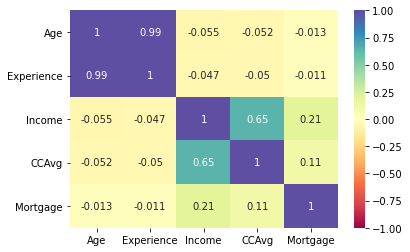

In [29]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, cmap='Spectral')   # generate heatmap based on correlation
plt.show()

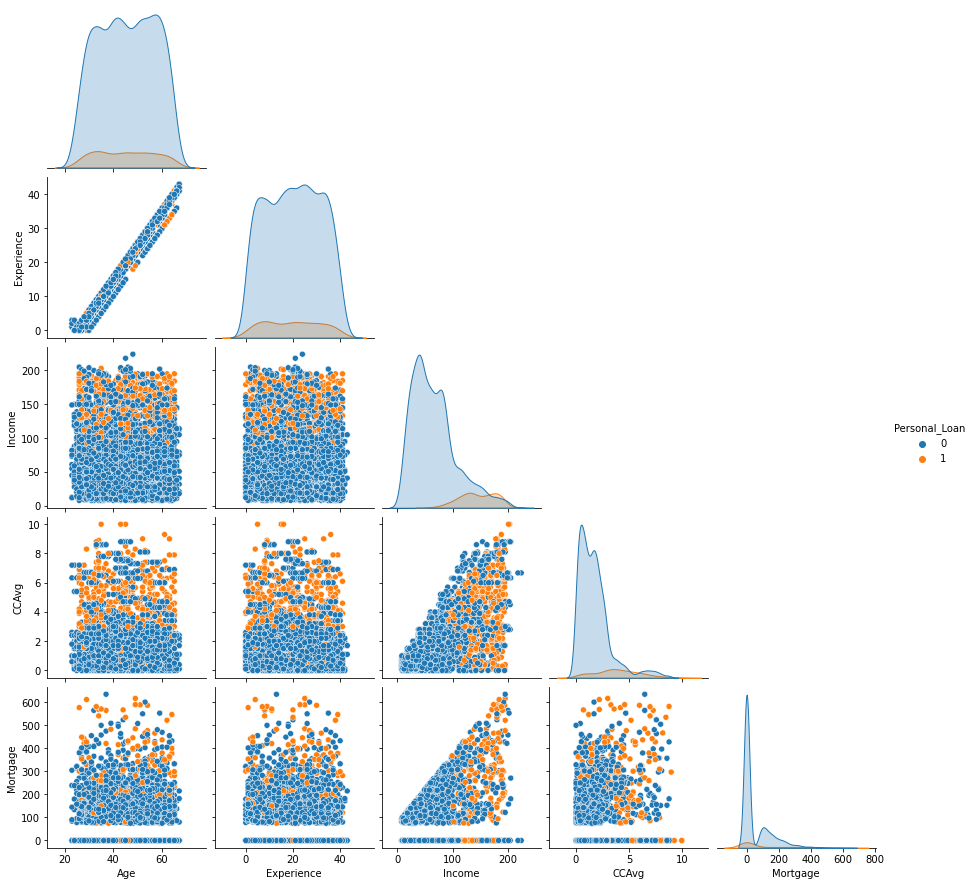

In [30]:
sns.pairplot(df, hue='Personal_Loan', corner=True)   # generate pairplot
plt.show()

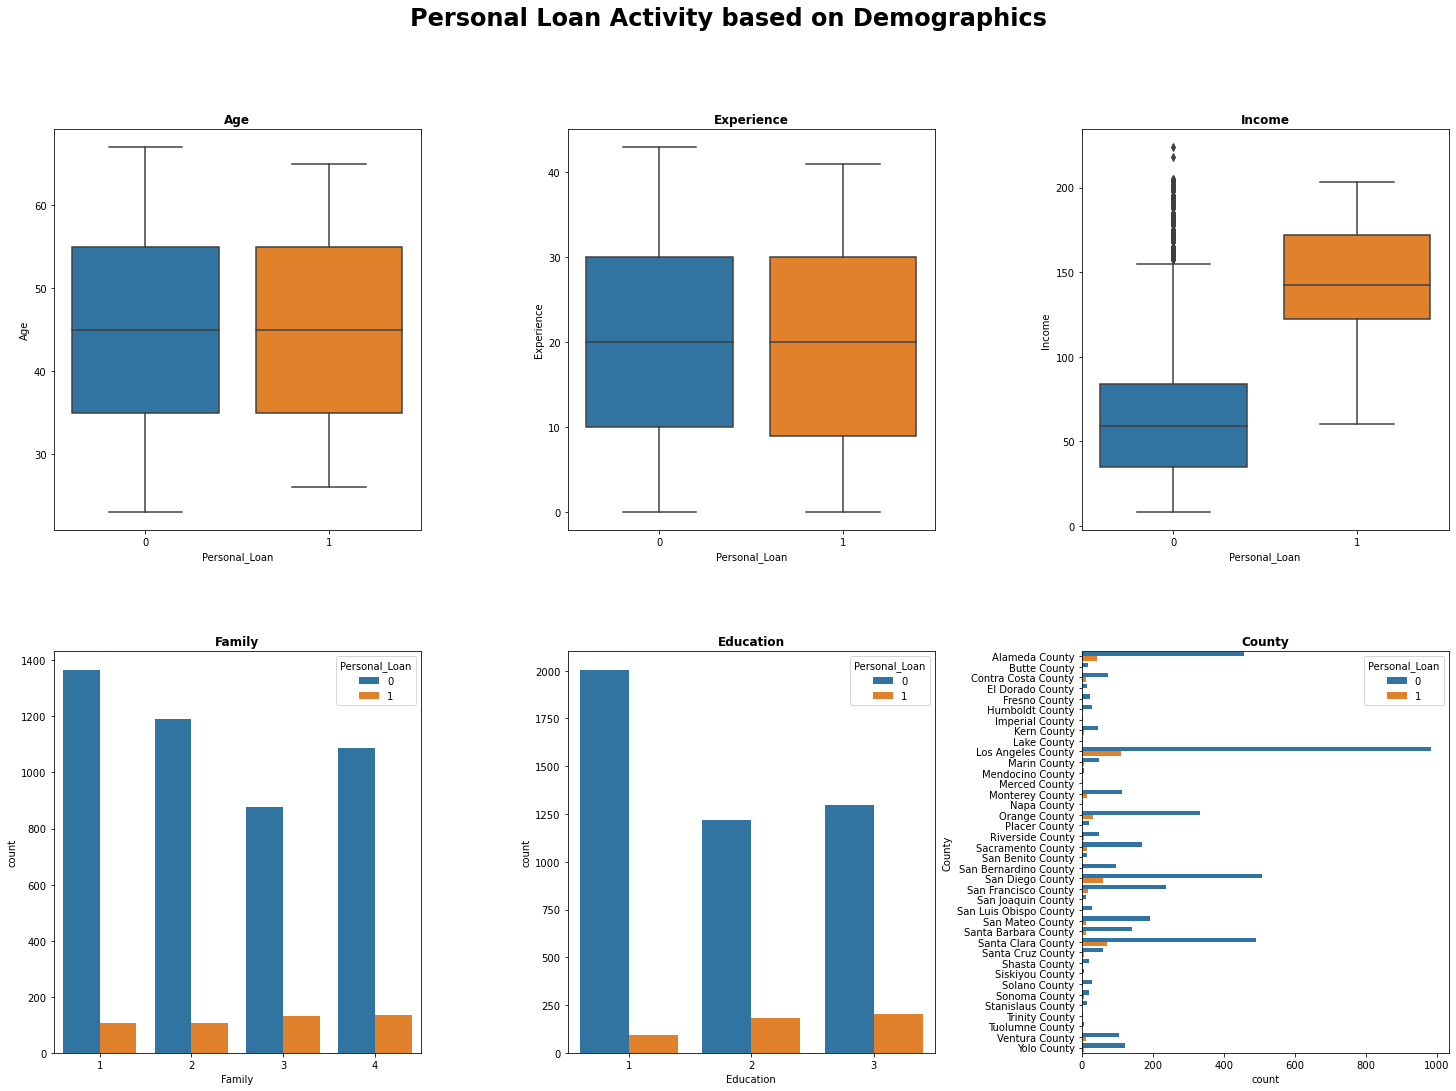

In [31]:
# create bivariate plots plotting impact of each independent variable on target variable Price 

# create 2x3-grid master plot with 6 subplots

mvplot1 = plt.figure(figsize=[25,17])
mvplot1.subplots_adjust(hspace=0.3, wspace=0.4)
mvplot1.suptitle("Personal Loan Activity based on Demographics", fontweight='bold', fontsize='24')

mvfeat0 = mvplot1.add_subplot(2,3,1)
sns.boxplot(x='Personal_Loan', y='Age', data=df, ax=mvfeat0);
mvfeat0.set_title('Age', fontweight='bold')

mvfeat1 = mvplot1.add_subplot(2,3,2)
sns.boxplot(x='Personal_Loan', y='Experience', data=df, ax=mvfeat1);
mvfeat1.set_title('Experience', fontweight='bold')

mvfeat2 = mvplot1.add_subplot(2,3,3)
sns.boxplot(x='Personal_Loan', y='Income', data=df, ax=mvfeat2);
mvfeat2.set_title('Income', fontweight='bold')

mvfeat3 = mvplot1.add_subplot(2,3,4)
sns.countplot(x='Family', hue='Personal_Loan', data=df, ax=mvfeat3);
mvfeat3.set_title('Family', fontweight='bold')

mvfeat4 = mvplot1.add_subplot(2,3,5)
sns.countplot(x='Education', hue='Personal_Loan', data=df, ax=mvfeat4);
mvfeat4.set_title('Education', fontweight='bold')

mvfeat5 = mvplot1.add_subplot(2,3,6)
sns.countplot(y='County', hue='Personal_Loan', data=df, ax=mvfeat5);
mvfeat5.set_title('County', fontweight='bold')

plt.show()

#### Observations
- Age and Experience bear no impact on likelihood of customers accepting a personal loan.
- Higher Income however is a significant driver for customers deciding on personal loans.
- Bigger Family size and higher Education have slight bearing on having personal loans.
- Majority of customers that opted for Personal Loans are concentrated in the major California metro areas. 

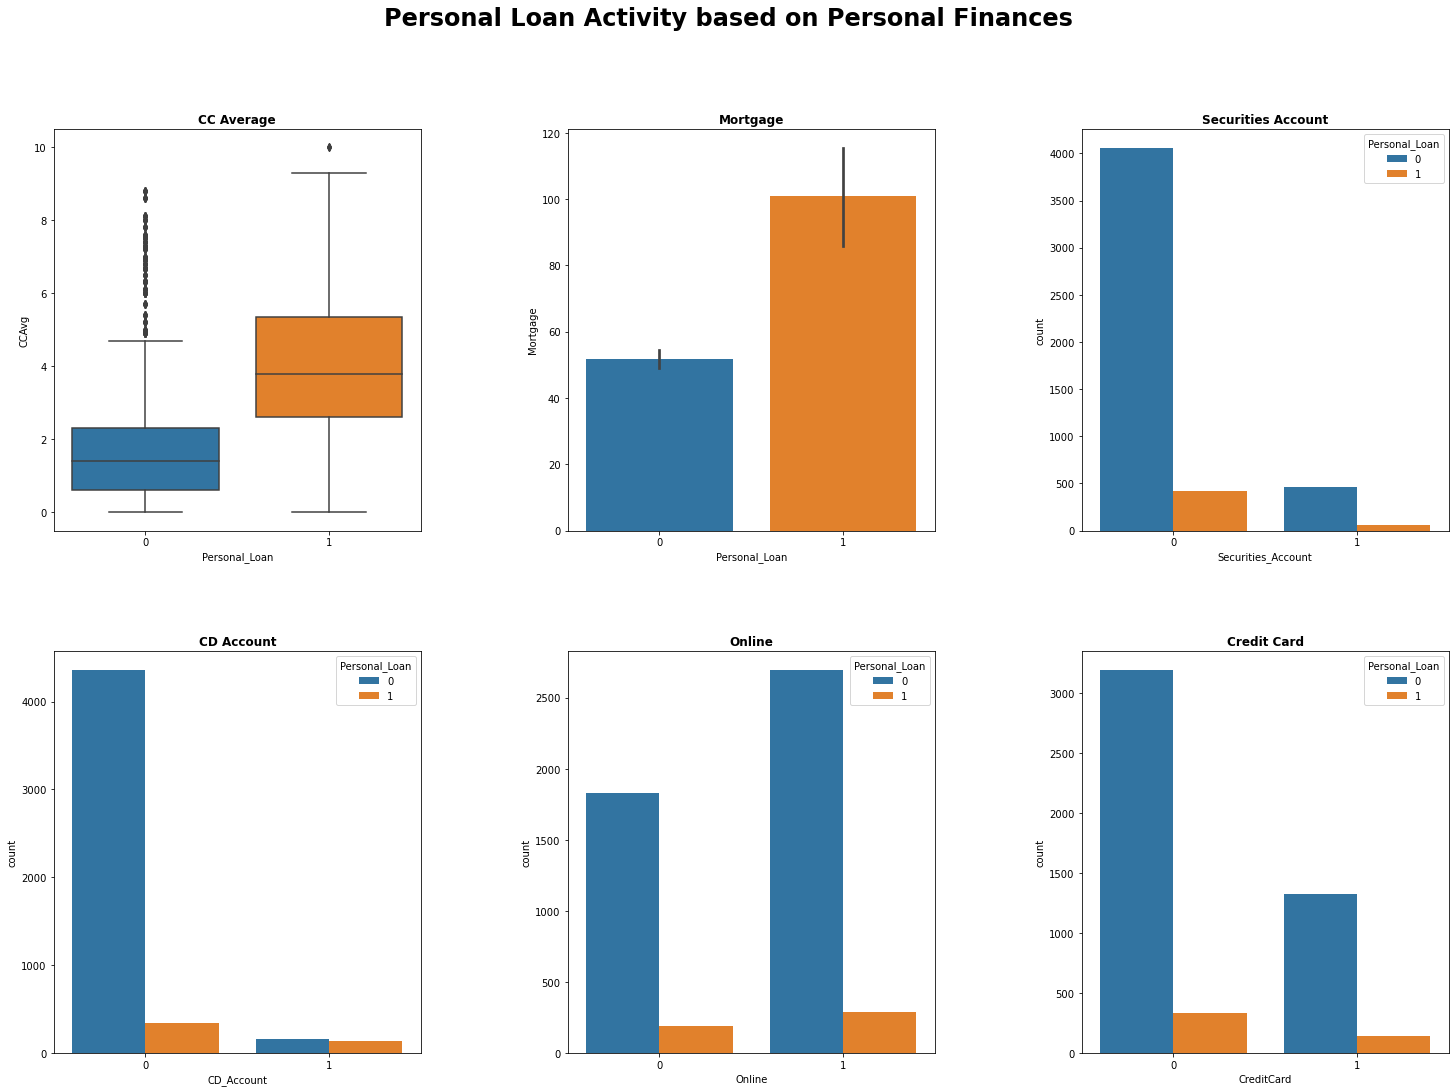

In [32]:
# create bivariate plots plotting impact of each independent variable on target variable Price 

# create 2x3 grid master plot with 6 subplots

mvplot2 = plt.figure(figsize=[25,17])
mvplot2.subplots_adjust(hspace=0.3, wspace=0.4)
mvplot2.suptitle("Personal Loan Activity based on Personal Finances", fontweight='bold', fontsize='24')

mvfeat6 = mvplot2.add_subplot(2,3,1)
sns.boxplot(x='Personal_Loan', y='CCAvg', data=df, ax=mvfeat6);
mvfeat6.set_title('CC Average', fontweight='bold')

mvfeat7 = mvplot2.add_subplot(2,3,2)
sns.barplot(x='Personal_Loan', y='Mortgage', data=df, ax=mvfeat7);
mvfeat7.set_title('Mortgage', fontweight='bold')

mvfeat8 = mvplot2.add_subplot(2,3,3)
sns.countplot(x='Securities_Account', hue='Personal_Loan', data=df, ax=mvfeat8);
mvfeat8.set_title('Securities Account', fontweight='bold')

mvfeat9 = mvplot2.add_subplot(2,3,4)
sns.countplot(x='CD_Account', hue='Personal_Loan', data=df, ax=mvfeat9);
mvfeat9.set_title('CD Account', fontweight='bold')

mvfeat10 = mvplot2.add_subplot(2,3,5)
sns.countplot(x='Online', hue='Personal_Loan', data=df, ax=mvfeat10);
mvfeat10.set_title('Online', fontweight='bold')

mvfeat11 = mvplot2.add_subplot(2,3,6)
sns.countplot(x='CreditCard', hue='Personal_Loan', data=df, ax=mvfeat11);
mvfeat11.set_title('Credit Card', fontweight='bold')

plt.show()

#### Observations
- Customers who opted for Personal Loans also spend more via credit card.
- Customers who opted for Personal Loans also more likely to carry Mortgages.
- Though they were less likely to have Securities accounts and CD accounts.

### Preparing Data for Modeling

#### Model Evaluation Criteria
1. Loss of Resource - Predicting a customer will accept a personal loan, but they actually don't. 
2. Loss of Opportunity - Predicting a customer will not accept a personal loan, but they actually do.

- Second scenario is more important in the context of capturing as many potential new customers. 
- Model objective is to minimize Loss of Opportunity (i.e. False Negatives) and therefore the correct metric to gauge model performance should be Recall.
- Since data is imbalanced it may not be advisable to use Accuracy.
- Therefore we need to maximize Recall and also keep an eye on improving Precision and F1 score. 

In [33]:
# create dummy variables for appropriate categorical variables while dropping the first one-hot encoded column
# assign to new dataframe version

df1 = pd.get_dummies(data=df, columns=['Family', 'Education', 'County'], drop_first=True)
df1.head()   # check updated feature columns with dummy variables

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# split the dataset by independent variables and dependent variable

X = df1.drop(['Personal_Loan'], axis=1)   # independent variables
Y = df1['Personal_Loan']   # dependent variable

In [35]:
# split the dataset in 70:30 ratio for training and testing datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [36]:
# get shapes of training set and testing set
# get class breakdown in training set and testing set to check for imbalances. 

print("Shape of Training Set : ", X_train.shape)
print("Shape of Testing Set : ", X_test.shape)

print("Percentage of classes in Training Set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in Testing Set:")
print(Y_test.value_counts(normalize=True))

Shape of Training Set :  (3500, 51)
Shape of Testing Set :  (1500, 51)
Percentage of classes in Training Set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in Testing Set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Logistic Regression Modeling

In [37]:
 # define function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):

    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [38]:
# define function to plot the confusion matrix of a classification model built using sklearn

def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):

    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in ["0 - No","1 - Yes"]],
           columns = [i for i in ['0 - No','1 - Yes']])

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [39]:
# fit the logistic regression model using newton-cg solver for high-dimensional data
# since the classes are imbalanced we should manually specify weight for each class

logreg = LogisticRegression(solver="newton-cg", class_weight={0:0.15,1:0.85}, random_state=1)
model = logreg.fit(X_train, Y_train)

In [40]:
# find the coefficients

log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
coef,0.020155,-0.016556,0.050937,0.264446,0.000685,-0.627193,2.527672,-0.428208,-0.619707,-0.132874,1.569943,1.122298,2.330503,2.44748,-0.114508,0.118567,-0.146263,-0.09003,-0.192642,-0.004661,0.583129,-0.015747,0.127061,0.254328,-0.122575,-0.09229,-0.050362,-0.006532,-0.135369,0.192082,0.997146,0.188672,-0.094317,-0.505452,0.148201,0.208038,-0.013415,-0.220855,-0.746103,0.173755,0.126307,-0.023327,-0.125995,-0.037383,0.088307,0.250202,-0.103945,-0.060279,-0.0355,0.087778,-0.20648


#### Observations
- Coefficients of Age, Income, CCAvg, Mortgage, CD_Account, Family_3, Family4, Education_2 and Education_3 are positive, therefore an increase in these will lead to an increase in chances of a customer accepting a Personal Loan.
- Coefficients of Experience, Securities_Account, Online, CreditCard and Family_2 are negative, therefore an increase in these will lead to a decrease in chances of a customer accepting a Personal Loan.
- Coefficients of major metropolitan areas are also positive. 

In [41]:
# convert coefficients to odds
odds = np.exp(logreg.coef_[0])

# find the percentage change
perc_change_odds = (np.exp(logreg.coef_[0]) - 1) * 100

# remove limit from number of columns to display
pd.set_option("display.max_columns", None)

# add the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County
Odds,1.02036,0.983580,1.052256,1.302710,1.000685,0.534089,12.524311,0.651676,0.538102,0.875576,4.806376,3.071906,10.283108,11.559178,0.891805,1.125882,0.863931,0.913904,0.824777,0.99535,1.791636,0.984376,1.135487,1.289594,0.884639,0.911841,0.950885,0.993490,0.873393,1.21177,2.710535,1.207644,0.909994,0.603233,1.159746,1.231260,0.986674,0.801833,0.474211,1.189764,1.13463,0.976943,0.881619,0.963307,1.092324,1.284285,0.901275,0.941501,0.965123,1.091745,0.813443
Change_odd%,2.03596,-1.641974,5.225639,30.270959,0.068503,-46.591100,1152.431107,-34.832434,-46.189817,-12.442435,380.637565,207.190593,928.310789,1055.917763,-10.819527,12.588219,-13.606948,-8.609649,-17.522317,-0.46502,79.163557,-1.562387,13.548651,28.959423,-11.536067,-8.815946,-4.911450,-0.651038,-12.660684,21.17697,171.053496,20.764442,-9.000612,-39.676727,15.974645,23.125973,-1.332586,-19.816737,-52.578916,18.976434,13.46301,-2.305673,-11.838093,-3.669263,9.232353,28.428497,-9.872526,-5.849857,-3.487742,9.174534,-18.655743


#### Observations
Holding all other features constant a unit change in: 
- Age will increase the odds of a customer accepting loan by 2.04%.
- Experience will decrease the odds by 1.6%
- Income will increase the odds by 5%
- CCAvg will increase the odds by 30%
- Mortgage will increase the odds by 0.07%
- Securities_Account will decrease the odds by 47%
- CD_Account will increase the odds by 1152%
- Online will decrease the odds by 35%
- CreditCard will decrease the odds by 46%
- Family_2 will decrease the odds by 12%
- Family_3 will increase the odds by 381%
- Family_4 will increase the odds by 207%
- Education_2 will increase the odds by 928%
- Education_3 will increase the odds by 1056%
- Interpretation for Counties can be made similarly.

The most significant variables driving customer personal loan acceptance are Income, CCAvg, CD_Account, Family_2, Family_3, Education_2, Education_3 as well as major metropolitan Counties. 

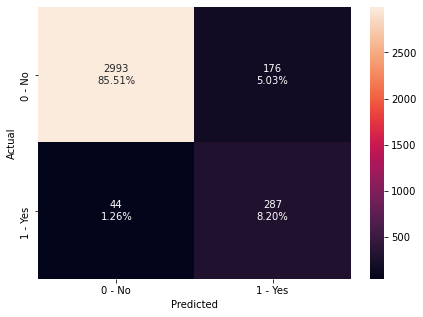

In [42]:
# create confusion matrix for training set (baseline - 0.5 threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_train, Y_train)

In [43]:
# check training set performance (baseline - 0.5 threshold)

log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(logreg, X_train, Y_train)
print("Training Set Performance (Baseline - 0.5 Threshold):")
log_reg_model_train_perf

Training Set Performance (Baseline - 0.5 Threshold):


,Accuracy,Recall,Precision,F1
0,0.937143,0.867069,0.61987,0.722922


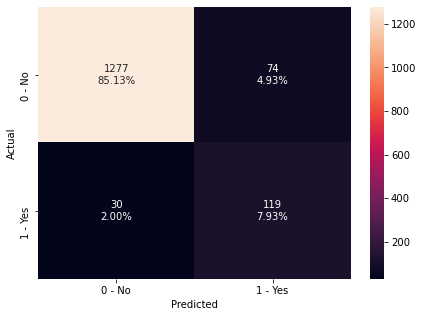

In [44]:
# create confusion matrix for testing set (baseline - 0.5 threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_test, Y_test)

In [45]:
# check testing set performance (baseline - 0.5 threshold)

log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(logreg, X_test, Y_test)
print("Testing Set Performance (Baseline - 0.5 Threshold):")
log_reg_model_test_perf

Testing Set Performance (Baseline - 0.5 Threshold):


,Accuracy,Recall,Precision,F1
0,0.930667,0.798658,0.61658,0.695906


#### Observations
- Baseline model (Threshold 0.5) performance is consistent across both training and testing sets.
- Recall, Precision and F1 are low for both training and testing sets. 
- Utilize ROC curve to determine optimal threshold to improve metrics.

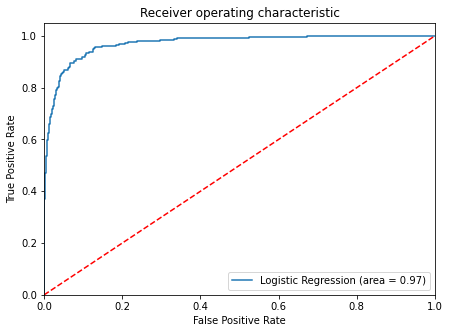

In [46]:
# plot AUC-ROC curve

logit_roc_auc_train = roc_auc_score(Y_train, logreg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(Y_train, logreg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [47]:
# Optimal threshold as per AUC-ROC curve

fpr, tpr, thresholds = roc_curve(Y_train, logreg.predict_proba(X_train)[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal threshold as per AUC-ROC curve: ", optimal_threshold_auc_roc)

Optimal threshold as per AUC-ROC curve:  0.43710881720943634


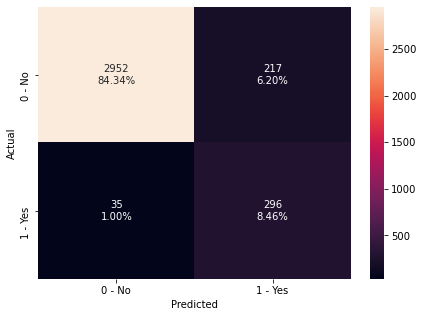

In [48]:
# create confusion matrix for training set (AUC-ROC Optimal Threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_train, Y_train, threshold=optimal_threshold_auc_roc)

In [49]:
# check training set performance (AUC-ROC optimal threshold)

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    logreg, X_train, Y_train, threshold=optimal_threshold_auc_roc)
print("Training Set Performance - AUC-ROC Optimal Threshold:")
log_reg_model_train_perf_threshold_auc_roc

Training Set Performance - AUC-ROC Optimal Threshold:


,Accuracy,Recall,Precision,F1
0,0.928,0.89426,0.576998,0.701422


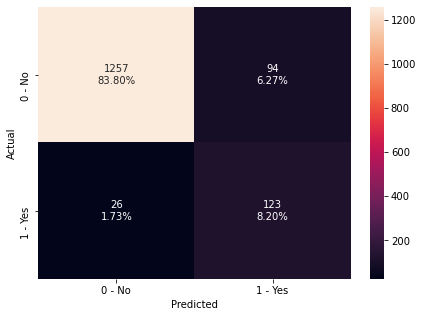

In [50]:
# create confusion matrix for testing set (AUC-ROC optimal threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_test, Y_test, threshold=optimal_threshold_auc_roc)

In [51]:
# check testing set performance (AUC-ROC optimal threshold)

log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    logreg, X_test, Y_test, threshold=optimal_threshold_auc_roc)
print("Testing Set Performance - AUC-ROC Optimal Threshold:")
log_reg_model_test_perf_threshold_auc_roc

Testing Set Performance - AUC-ROC Optimal Threshold:


,Accuracy,Recall,Precision,F1
0,0.92,0.825503,0.56682,0.672131


#### Observations
- While Recall improved, Precision fell lower. considerably.
- Try Precision-Recall curve to determine a better threshold improve both metrics. 

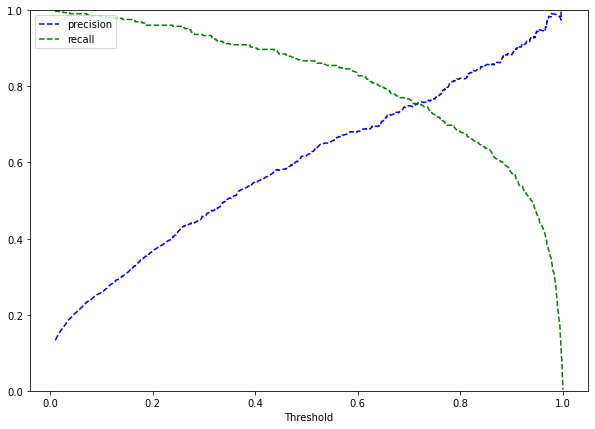

In [52]:
# plot Precision-Recall curve

y_scores = logreg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)

def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_thresh(prec, rec, tre)
plt.show()

#### Observations
- Intersection of Precision and Recall is at about Threshold 0.72

In [53]:
# set optimal threshold value based on Precision-Recall curve

optimal_threshold_prec_rec_curve = 0.72

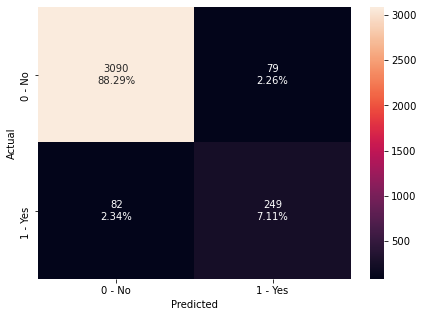

In [54]:
# create confusion matrix for training set (precision-recall optimal threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_train, Y_train, threshold=optimal_threshold_prec_rec_curve)

In [55]:
# check training set performance (precision-recall optimal threshold)

log_reg_model_train_perf_threshold_prec_rec_curve = model_performance_classification_sklearn_with_threshold(
    logreg, X_train, Y_train, threshold=optimal_threshold_prec_rec_curve)
print("Training Set Performance - Precision-Recall Optimal Threshold:")
log_reg_model_train_perf_threshold_prec_rec_curve

Training Set Performance - Precision-Recall Optimal Threshold:


,Accuracy,Recall,Precision,F1
0,0.954,0.752266,0.759146,0.75569


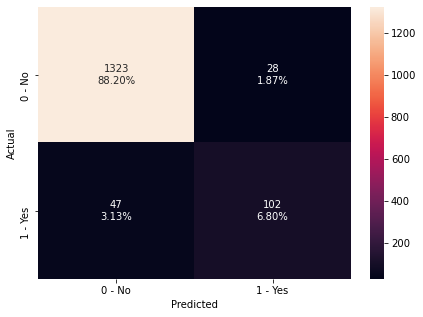

In [56]:
# create confusion matrix for testing set (precision-recall optimal threshold)

confusion_matrix_sklearn_with_threshold(logreg, X_test, Y_test, threshold=optimal_threshold_prec_rec_curve)

In [57]:
# check testing set performance (precision-recall optimal threshold)

log_reg_model_test_perf_threshold_prec_rec_curve = model_performance_classification_sklearn_with_threshold(
    logreg, X_test, Y_test, threshold=optimal_threshold_prec_rec_curve)
print("Testing Set Performance - Precision-Recall Optimal Threshold:")
log_reg_model_test_perf_threshold_prec_rec_curve

Testing Set Performance - Precision-Recall Optimal Threshold:


,Accuracy,Recall,Precision,F1
0,0.95,0.684564,0.784615,0.731183


In [58]:
# Logistic Regression model training set performance comparison

models_train_comp_df = pd.concat([
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_prec_rec_curve.T], axis=1)

models_train_comp_df.columns = [
    "Threshold 0.50",
    "Threshold 0.44",
    "Threshold 0.72"]

print("Logistic Regression Model - Training Set Performance Comparison:")
models_train_comp_df

Logistic Regression Model - Training Set Performance Comparison:


,Threshold 0.50,Threshold 0.44,Threshold 0.72
Accuracy,0.937143,0.928000,0.954000
Recall,0.867069,0.894260,0.752266
Precision,0.619870,0.576998,0.759146
F1,0.722922,0.701422,0.755690


In [59]:
# testing performance comparison

models_test_comp_df = pd.concat([
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_prec_rec_curve.T], axis=1)

models_test_comp_df.columns = [
    "Threshold 0.50",
    "Threshold 0.44",
    "Threshold 0.72"]

print("Logistic Regression Model - Testing Set Performance Comparison:")
models_test_comp_df

Logistic Regression Model - Testing Set Performance Comparison:


,Threshold 0.50,Threshold 0.44,Threshold 0.72
Accuracy,0.930667,0.920000,0.950000
Recall,0.798658,0.825503,0.684564
Precision,0.616580,0.566820,0.784615
F1,0.695906,0.672131,0.731183


#### Observations
- Since the datasets are imbalanced, using Precision-Recall curve may be more appropriate than AUC-ROC curve.
- Precision-Recall gives optimal threshold at 0.72 which increases Precision however decreases Recall.
- Logistic Regression model performs well however we can explore Decision Tree modeling to see if we can improve Recall. 

### Decision Tree Modeling

In [60]:
## Function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in ["0 - No","1 - Yes"]],
           columns = [i for i in ['0 - No','1 - Yes']])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def get_model_performance(model, predictors, target):

    pred = model.predict(predictors)   # predicting using the independent variables

    acc = accuracy_score(target, pred)   # to compute Accuracy
    recall = recall_score(target, pred)   # to compute Recall
    precision = precision_score(target, pred)   # to compute Precision
    f1 = f1_score(target, pred)   # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy":acc, "Recall":recall, "Precision":precision, "F1":f1,}, index=[0])

    return df_perf

In [62]:
# use default 'gini' criteria to fit baseline model

dectree = DecisionTreeClassifier(criterion = 'gini', class_weight={0:0.15,1:0.85}, random_state=1)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

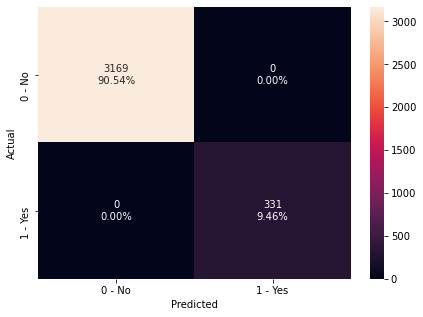

In [63]:
# create confusion matrix for training set (baseline tree)

confusion_matrix_sklearn(dectree, X_train, Y_train)

In [64]:
# check training set performance (baseline tree)

get_model_performance(dectree, X_train, Y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


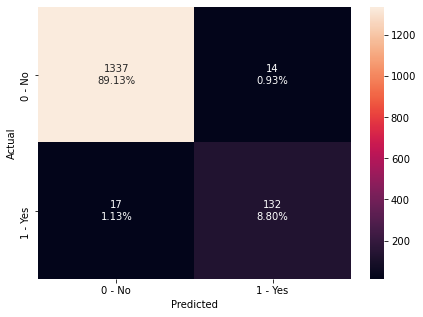

In [65]:
# create confusion matrix for testing set (baseline tree)

confusion_matrix_sklearn(dectree, X_test, Y_test)

In [66]:
# check testing set performance (baseline tree)

get_model_performance(dectree, X_test, Y_test)

,Accuracy,Recall,Precision,F1
0,0.979333,0.885906,0.90411,0.894915


#### Observations
- Recall of 1.0 on training set is expected.
- Difference in Recall between training and testing sets means model is overfitting.
- Need to prune the decision tree. 

In [67]:
# list feature names

feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County'

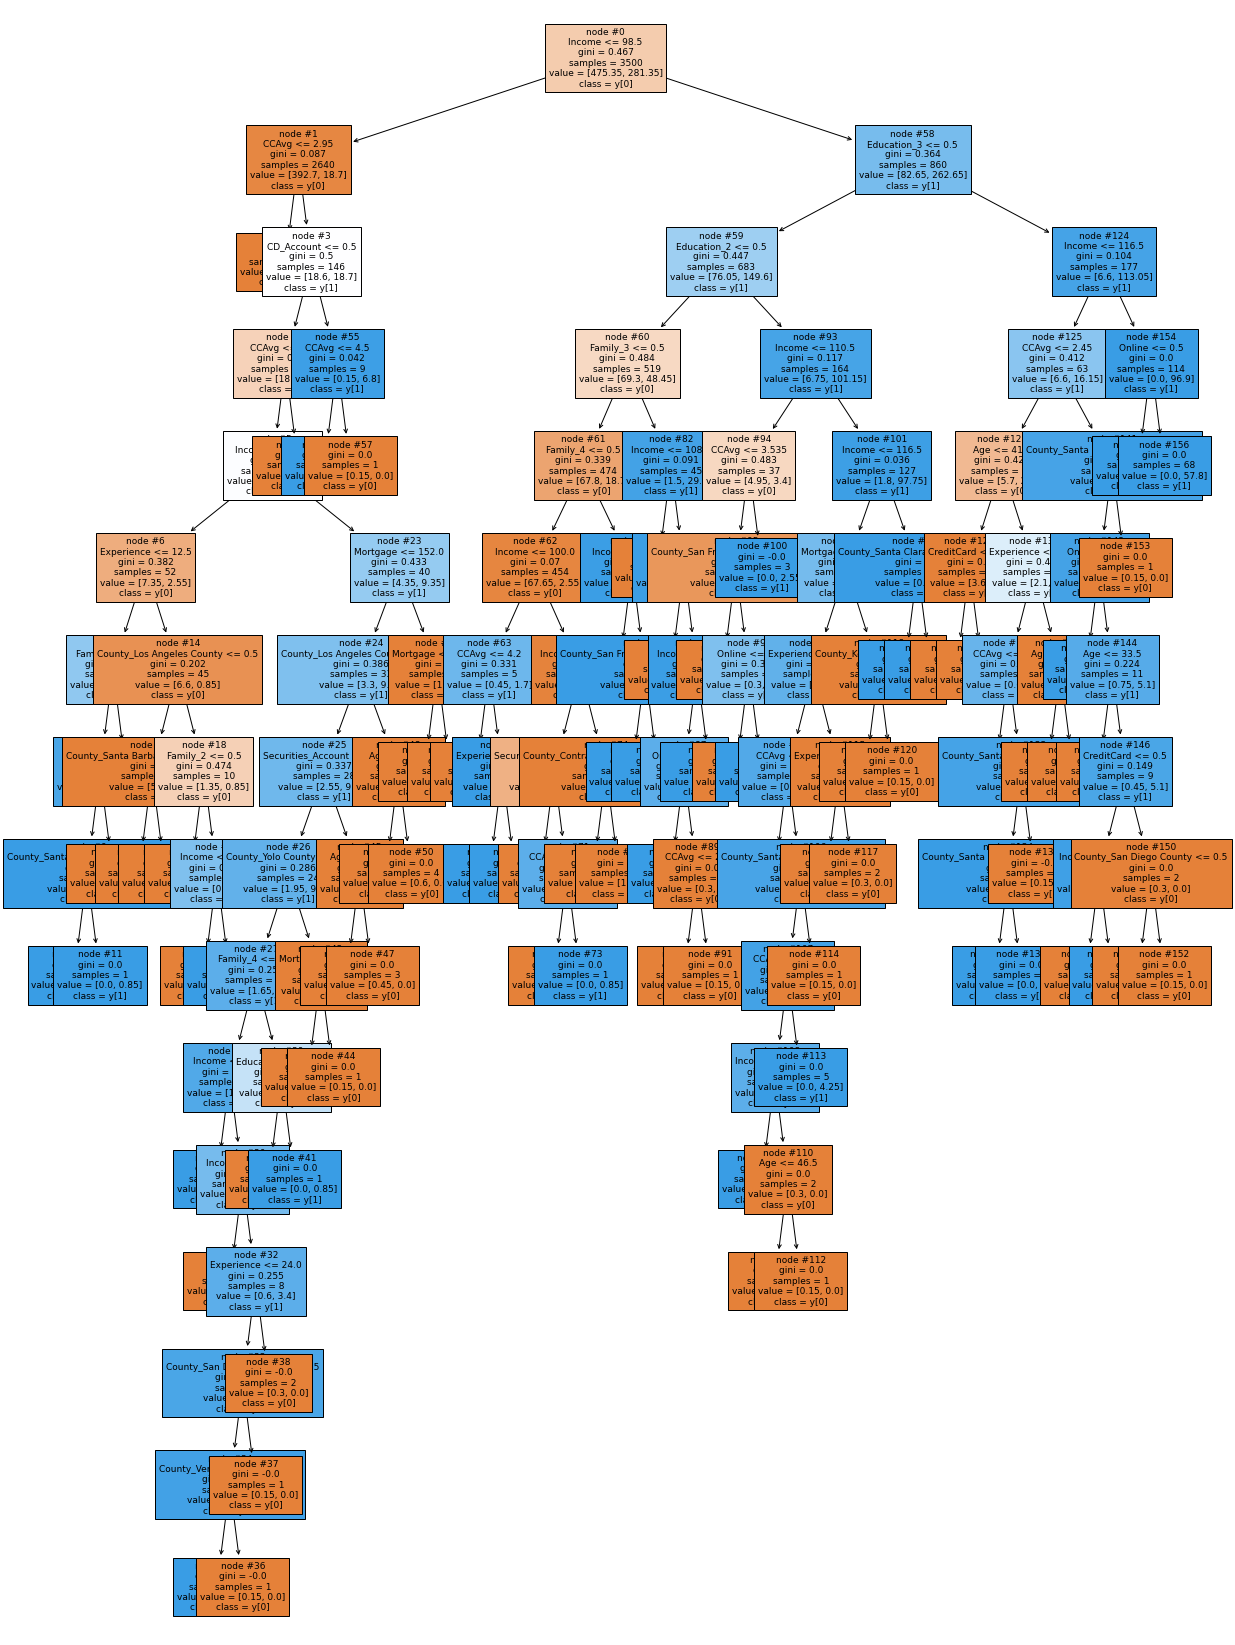

In [68]:
# visualize the decision tree

plt.figure(figsize=(20,30))
tree.plot_tree(dectree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [69]:
# get text report showing the rules of decision tree

print(tree.export_text(dectree,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- County_Santa Clara County <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- County_Santa Clara County >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- County_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |-

In [70]:
# list features in order of importance 

print (pd.DataFrame(dectree.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                 Importance
Income                         5.954997e-01
Education_2                    8.813411e-02
CCAvg                          8.271605e-02
Family_4                       7.100876e-02
Family_3                       7.032437e-02
Education_3                    3.713789e-02
CD_Account                     1.099955e-02
Experience                     1.048164e-02
Age                            5.640056e-03
Mortgage                       5.165754e-03
Securities_Account             4.976279e-03
County_Los Angeles County      3.773823e-03
Online                         3.019645e-03
County_San Francisco County    2.849891e-03
Family_2                       1.696563e-03
County_Santa Clara County      1.552704e-03
CreditCard                     1.515209e-03
County_Yolo County             1.193814e-03
County_Ventura County          8.128401e-04
County_Santa Barbara County    7.544188e-04
County_San Diego County        7.469342e-04
County_Contra Costa County     2

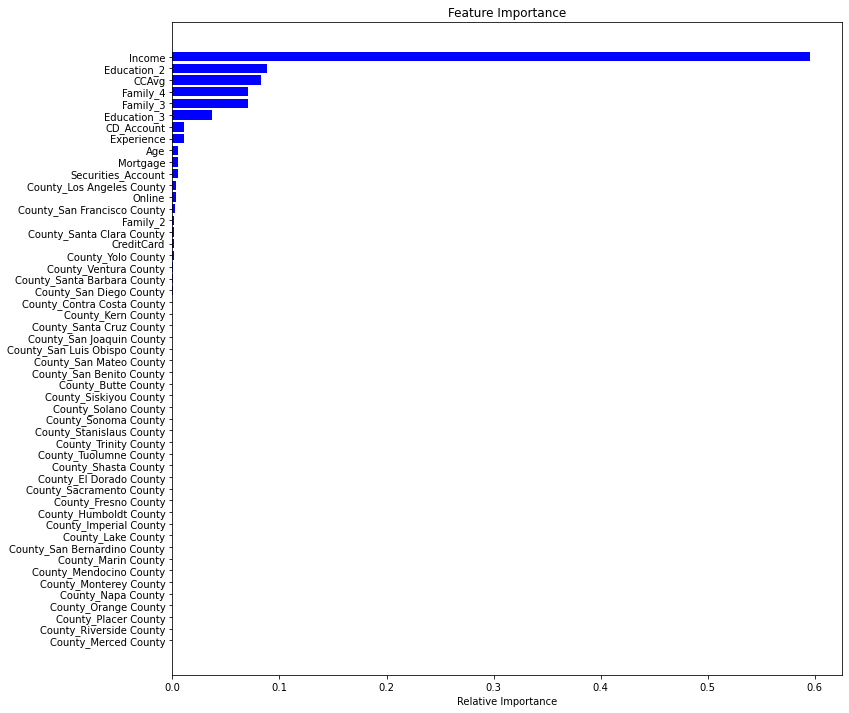

In [71]:
# plot bar chart of feature importance 

importance = dectree.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations
- According to the baseline model, Income is the most important variable for predicting if customer will accept Personal Loan.
- Tree is complex therefore will need pre and post pruning.

In [72]:
# Use GridSearch for Hyperparameter tuning of tree model

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

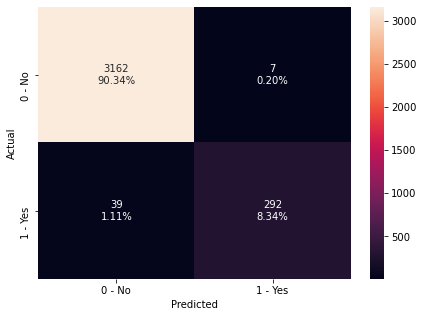

In [73]:
# create confusion matrix for training set (tree with tuned hyperparameters)

confusion_matrix_sklearn(estimator, X_train, Y_train)

In [74]:
# check training set performance (tree with tuned hyperparameters)

get_model_performance(estimator, X_train, Y_train)

,Accuracy,Recall,Precision,F1
0,0.986857,0.882175,0.976589,0.926984


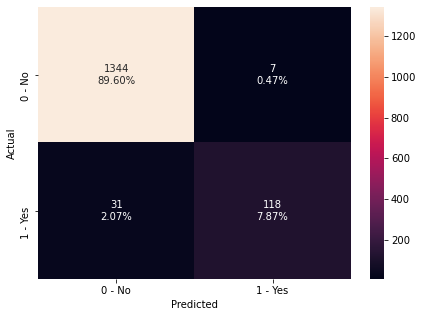

In [75]:
# create confusion matrix for testing set (tree with tuned hyperparameters)

confusion_matrix_sklearn(estimator, X_test, Y_test)

In [76]:
# check testing set performance (tree with tuned hyperparameters)

get_model_performance(estimator, X_test, Y_test)

,Accuracy,Recall,Precision,F1
0,0.974667,0.791946,0.944,0.861314


#### Observations
- With hyperparameter tuning, the overfitting has reduced but Recall has not improved. 

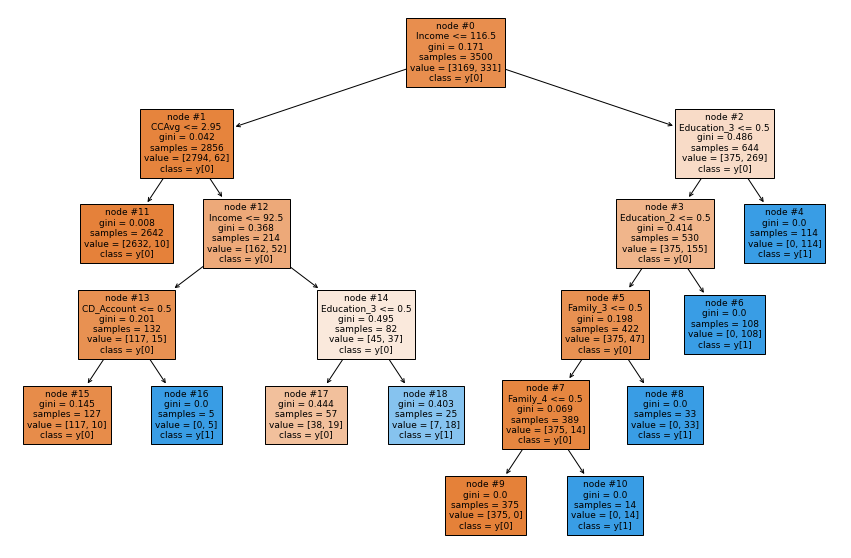

In [77]:
# visualize the tree (with hyperparameter tuning)

plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [78]:
# get text report showing the rules of decision tree (with hyperparameter tuning)

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [38.00, 19.00] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- weights: [7.00, 18.00] class: 1
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 33.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [0.00, 108.

In [79]:
# list importance of features in the tree building (with hyperparameter tuning)

print (pd.DataFrame(estimator.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                               Importance
Income                           0.335478
Education_2                      0.258373
Education_3                      0.188599
Family_3                         0.107563
Family_4                         0.051352
CCAvg                            0.043100
CD_Account                       0.015535
Age                              0.000000
County_San Mateo County          0.000000
County_San Luis Obispo County    0.000000
County_San Joaquin County        0.000000
County_San Francisco County      0.000000
County_Santa Clara County        0.000000
County_San Diego County          0.000000
County_San Bernardino County     0.000000
County_San Benito County         0.000000
County_Sacramento County         0.000000
County_Santa Barbara County      0.000000
County_Solano County             0.000000
County_Santa Cruz County         0.000000
County_Shasta County             0.000000
County_Siskiyou County           0.000000
County_Placer County             0

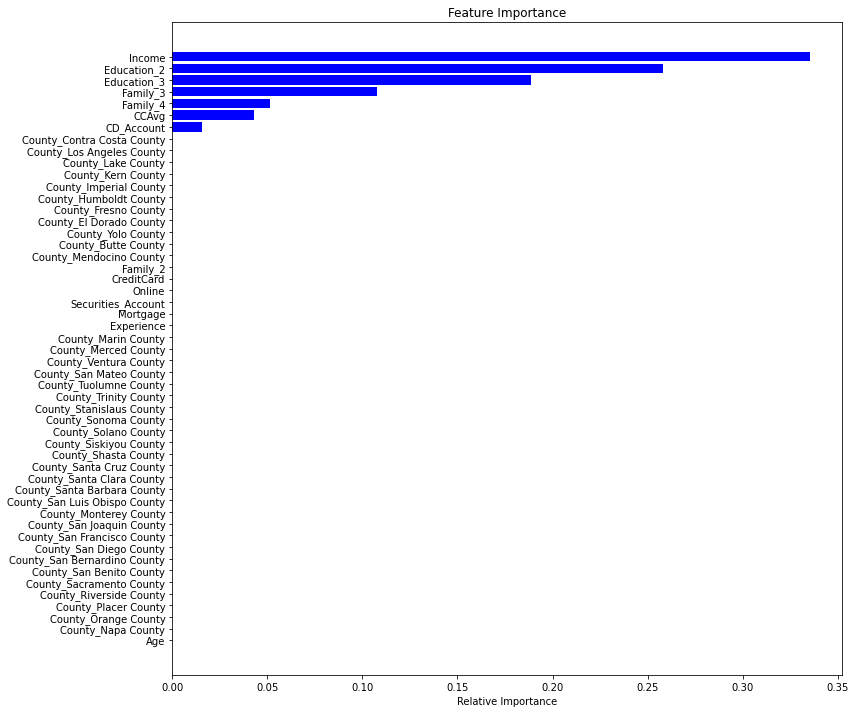

In [80]:
# plot feature importance (with hyperparamter tuning)

importance = estimator.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations
- After hyperparamter tuning, the most important variables are Income, Education_2, Education_3, Family_3, Family_4, CCAvg and CD Account. 
- Need to try post-pruning as well to see if we can improve the Recall and get better results. 

In [81]:
# try cost complexity pruning

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [82]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000188,0.001127
3,0.000269,0.002202
4,0.000269,0.002740
5,0.000326,0.004371
6,0.000359,0.005447
7,0.000381,0.005828
8,0.000381,0.006209
9,0.000381,0.006590


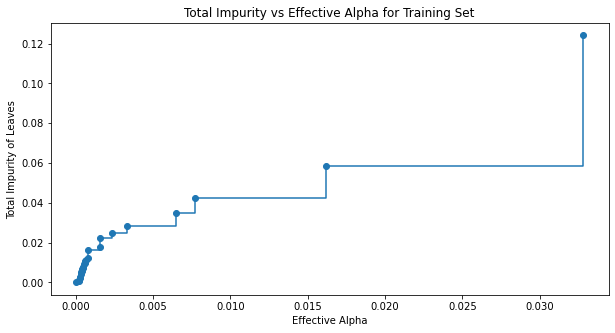

In [83]:
# plot impurity vs effective alpha chart

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

In [84]:
# train decision tree using the effective alphas

clfs = []
recall_train = []
recall_test = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    recall_train.append(metrics.recall_score(Y_train, Y_train_pred))
    recall_test.append(metrics.recall_score(Y_test, Y_test_pred))
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


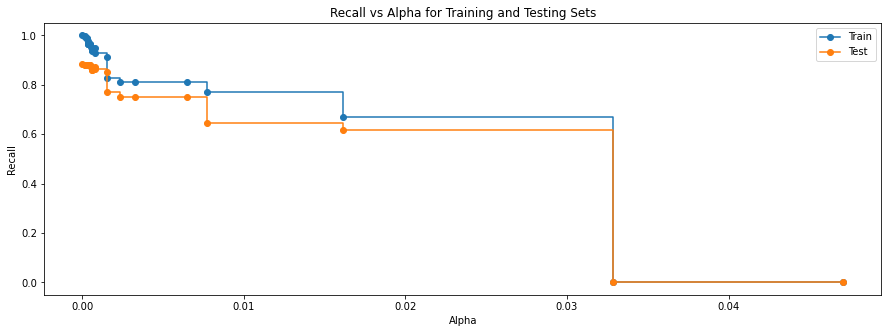

In [85]:
# plot recall vs alpha for training and testing sets

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="Train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="Test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
# create the model using ccp_alpha where we get highest training and testing recall

best_model = DecisionTreeClassifier(ccp_alpha=0.0015, class_weight={0:0.15, 1:0.85}, random_state=1)
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0015, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

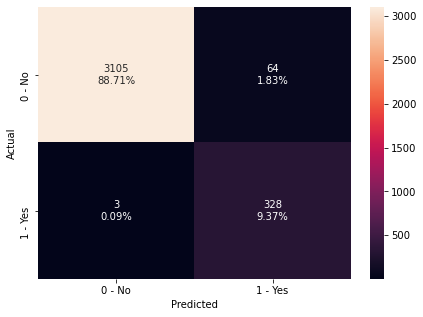

In [87]:
# create confusion matrix for training set (tree with optimal ccp_alpha)

confusion_matrix_sklearn(best_model, X_train, Y_train)

In [88]:
# check training set performance (tree with optimal ccp_alpha)

get_model_performance(best_model, X_train, Y_train)

,Accuracy,Recall,Precision,F1
0,0.980857,0.990937,0.836735,0.907331


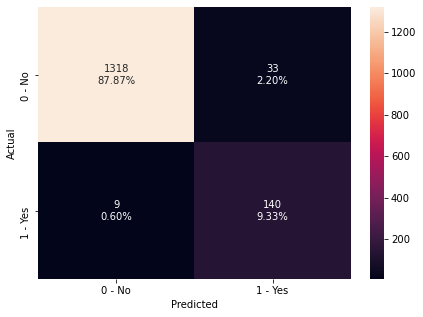

In [89]:
confusion_matrix_sklearn(best_model, X_test, Y_test)

In [90]:
# check testing set performance (tree with optimal ccp_alpha)

get_model_performance(best_model, X_test, Y_test)

,Accuracy,Recall,Precision,F1
0,0.972,0.939597,0.809249,0.869565


#### Observations 
- Recall has improved significantly on both training and testing sets after cost complexity pruning.
- This seems to be the best model as False Negatives has dropped down to 9.

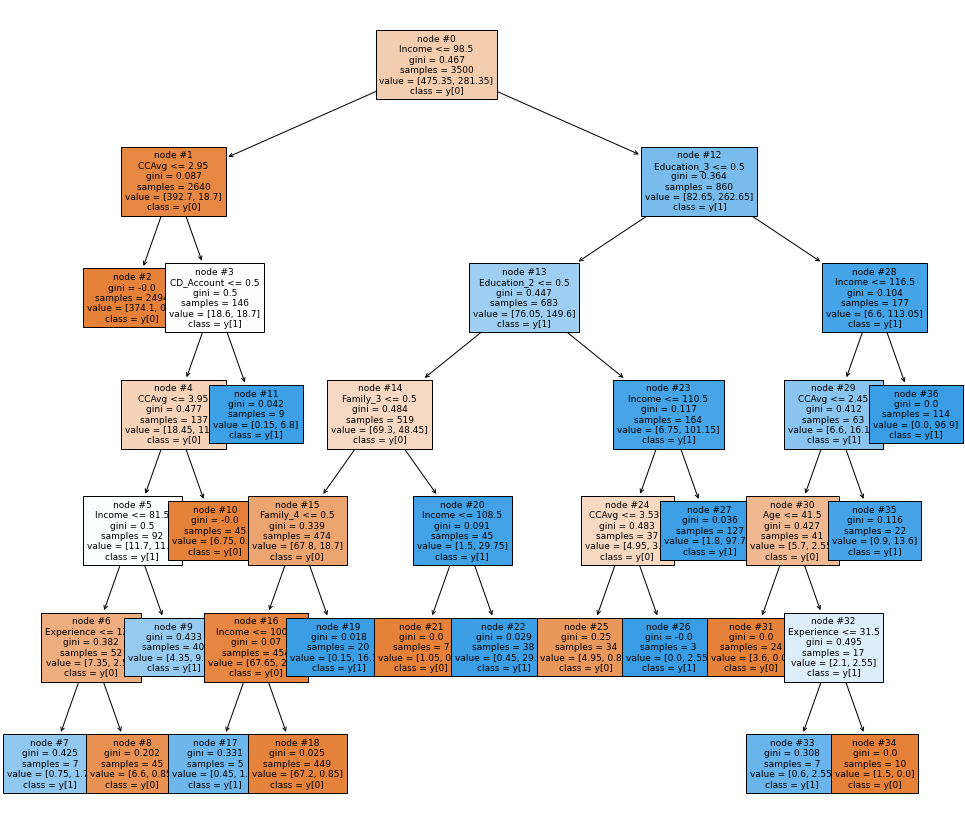

In [91]:
# visualize the decision tree (with optimal ccp_alpha)

plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [92]:
# get text report showing the rules of decision tree (with optimal ccp_alpha)

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- weights: [0.75, 1.70] class: 1
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- weights: [6.60, 0.85] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |   |--- Income >  100.00
|   |   |   |   |   | 

In [93]:
# list features by importance (tree with optimal ccp_alpha)

print (pd.DataFrame(best_model.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                               Importance
Income                           0.620141
Education_2                      0.093419
CCAvg                            0.079338
Family_3                         0.074541
Family_4                         0.072275
Education_3                      0.037256
CD_Account                       0.011659
Experience                       0.007710
Age                              0.003660
County_San Mateo County          0.000000
County_San Luis Obispo County    0.000000
County_San Joaquin County        0.000000
County_San Francisco County      0.000000
County_Santa Clara County        0.000000
County_San Diego County          0.000000
County_San Bernardino County     0.000000
County_San Benito County         0.000000
County_Santa Barbara County      0.000000
County_Solano County             0.000000
County_Santa Cruz County         0.000000
County_Shasta County             0.000000
County_Siskiyou County           0.000000
County_Riverside County          0

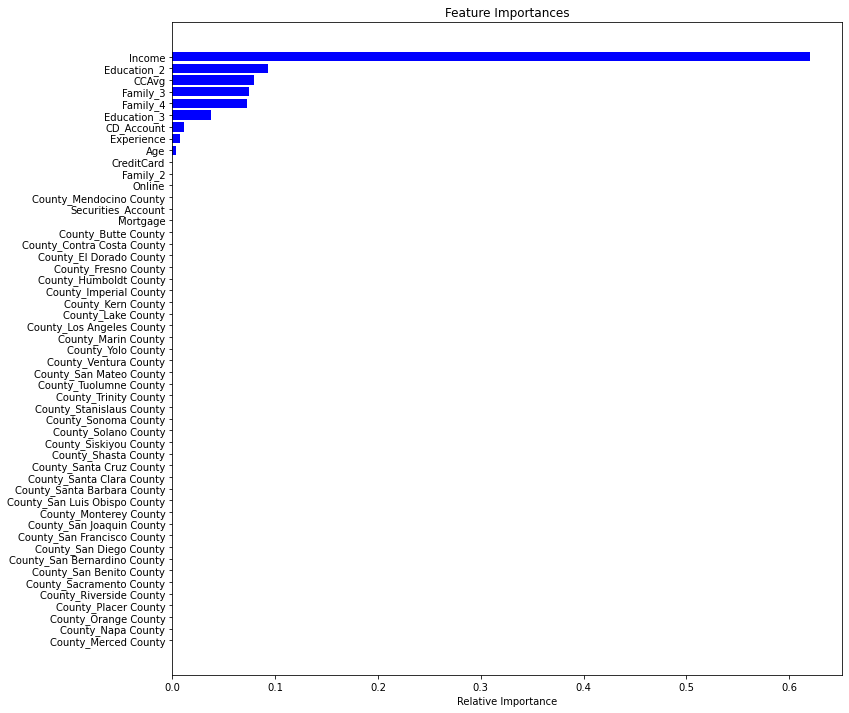

In [94]:
# plot feature importance (tree with optimal ccp_alpha)

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations
- After cost complexity pruning, the most important variables are Income, Education_2, Education_3, Family_3, Family_4, CCAvg and CD Account.

In [95]:
# final comparison of Recall values for training and testing sets. 

comparison_frame = pd.DataFrame({'Model':['Decision Tree (Baseline)','Decision Tree (Hyperparameter Tuning)',
                                         'Decision Tree (Cost Complexity Pruning)'], 'Train_Recall':[1,0.88,0.99], 'Test_Recall':[0.89,0.79,0.94]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Decision Tree (Baseline),1.00,0.89
1,Decision Tree (Hyperparameter Tuning),0.88,0.79
2,Decision Tree (Cost Complexity Pruning),0.99,0.94


#### Observations
- Cost complexity pruning has allowed the best Recall score for the testing set.
- This seems to be the best model as False Negatives dropped considerably to a count of only 9.
- Income, Education, Family size and CCAvg are important features in determining if a customer will opt for a Personal Loan. 

### Conclusion

#### Insights
- Decision Tree with cost complexity pruning proved to be the best model in predicting if a customer will decide on a Personal Loan.

#### Recommendations
- For promoting Personal Loans, the target customer typically has a high income (USD 100K and above), is highly educated (graduate degree or higher), is married with children, and has a high credit card spend per month.
- With the availability of more disposable income, this target segment can afford to make large purchases and spread out the payments.
- This high-earning segment typically has better credit scores when qualifying for loans.
- This segment is highly-educated and therefore more savvy when it comes to personal finances.
- One approach to attract more such customers is to provide an exclusive long-term 0% interest personal loan offer.
- Another approach is to assign financial advisors and/or relationship managers who will work closely with these customers providing tailored products and services while helping manage their finances. 